In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
%matplotlib inline
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
#matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [ ]:
file_path = '/content/drive/MyDrive/Machine Learning/credit_risk_dataset.csv'

df = pd.read_csv(file_path)
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [ ]:
df[df.duplicated()]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
15975,23,42000,RENT,5.0,VENTURE,B,6000,9.99,0,0.14,N,4
15989,23,90000,MORTGAGE,7.0,EDUCATION,B,8000,10.36,0,0.09,N,3
15995,24,48000,MORTGAGE,4.0,MEDICAL,A,4000,5.42,0,0.08,N,4
16025,24,10000,RENT,8.0,PERSONAL,A,3000,7.90,1,0.30,N,3
16028,23,100000,MORTGAGE,7.0,EDUCATION,A,15000,7.88,0,0.15,N,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32010,42,39996,MORTGAGE,2.0,HOMEIMPROVEMENT,A,2500,5.42,0,0.06,N,12
32047,36,250000,RENT,2.0,DEBTCONSOLIDATION,A,20000,7.88,0,0.08,N,17
32172,49,120000,MORTGAGE,12.0,MEDICAL,B,12000,10.99,0,0.10,N,12
32259,39,40000,OWN,4.0,VENTURE,B,1000,10.37,0,0.03,N,16


In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
rows_with_nan = df[df.isna().any(axis=1)]

rows_with_nan

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
39,23,71500,RENT,3.0,DEBTCONSOLIDATION,D,30000,NaN,1,0.42,N,4
50,24,78000,RENT,4.0,DEBTCONSOLIDATION,D,30000,NaN,1,0.38,Y,4
57,23,277000,OWN,3.0,PERSONAL,A,35000,NaN,0,0.13,N,4
59,24,12000,OWN,2.0,VENTURE,E,1750,NaN,0,0.15,Y,3
62,26,263000,MORTGAGE,0.0,EDUCATION,B,10000,NaN,1,0.04,N,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32547,53,4888,OWN,0.0,VENTURE,C,1400,NaN,1,0.29,Y,28
32552,65,45900,RENT,2.0,EDUCATION,C,10000,NaN,0,0.22,Y,19
32553,54,20000,RENT,2.0,MEDICAL,C,5000,NaN,0,0.25,N,28
32569,51,60000,MORTGAGE,1.0,PERSONAL,A,7500,NaN,0,0.13,N,23


### Initial Data observations

- The dataset contains **12 features(columns)** with **32,581 data points(rows)**;
- There are **no null**;
- There were **165** rows that were **duplicated**;
- There are about **3,915** values that have missing values. This accounts for about **12%** of the data.

#### Feature Columns

- **Person Age**: This is the age of the credit candidate;
- **Person Income**: Person annual income
- **Person Home ownership**: Type of home owership(Renting, mortgage, own, etc);
- **Person Emp Length**: How long as the candidate been employed for in years;
- **Loan Intent**: The intention for the loan;
- **Loan grade** : Level of risk assigned to each loan(A is the lowest risk loan);
- **Loan Amount**: This is the loan amount asked for;
- **Loan Int Rate**: Interest rate on the loan;
- **Loan status**: is loan in default(1) or non-default(0);
- **Loan Percentage income**: Percentage income dedicated to mortgate;
- **cb_person_default_on_file**: If the person has a default history;
- **cb_person_cred_hist_length**: Candidate credit history.

### Exploratory Data Analysis

#### Statistical Analysis
- Person has a **max age of 144** which is likely an error;
- there is an employement length of **123 years** which is likely an error;
- Some of the columns such has credit history and loan amount might have outliers. These will be dealt with later if this is the case.

In [ ]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32416.000000,3.241600e+04,31529.00000,32416.000000,29321.000000,32416.000000,32416.000000,32416.000000
mean,27.747008,6.609164e+04,4.79051,9593.845632,11.017265,0.218688,0.170250,5.811297
std,6.354100,6.201558e+04,4.14549,6322.730241,3.241680,0.413363,0.106812,4.059030
min,20.000000,4.000000e+03,0.00000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.854200e+04,2.00000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.00000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.921800e+04,7.00000,12250.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.00000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [ ]:
df.nunique()

,0
person_age,58
person_income,4295
person_home_ownership,4
person_emp_length,36
loan_intent,6
loan_grade,7
loan_amnt,753
loan_int_rate,348
loan_status,2
loan_percent_income,77


## Numeric Columns

In [ ]:
numeric_cols = df.columns[df.nunique() > 7].tolist()
numeric_cols

['person_age',
 'person_income',
 'person_emp_length',
 'loan_amnt',
 'loan_int_rate',
 'loan_percent_income',
 'cb_person_cred_hist_length']

## Categorical Columns

In [ ]:
df['loan_status'] = df['loan_status'].astype(str)

In [ ]:
categorical_cols = df.columns[df.nunique() <= 7].tolist()
# categorical_cols.remove('loan_status')
categorical_cols

['person_home_ownership',
 'loan_intent',
 'loan_grade',
 'loan_status',
 'cb_person_default_on_file']

In [ ]:
cols = list(df.columns)
cols.append(cols.pop(cols.index('loan_status')))
# Reorder the DataFrame based on the new column order
df = df[cols]

# Display the updated DataFrame
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,0.59,Y,3,1
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0.10,N,2,0
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,0.57,N,3,1
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,0.53,N,2,1
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,0.55,Y,4,1


## Counting Values For Categorical Columns

In [ ]:
value_counts_dict = {}

# Iterate through each categorical column
for col in categorical_cols:
    # Get value counts and percentages
    value_counts = df[col].value_counts()
    percentages = value_counts / value_counts.sum() * 100

    # Store both counts and percentages in a DataFrame
    value_counts_dict[col] = pd.DataFrame({
        'Counts': value_counts,
        'Percentage (%)': percentages
    })

# Display the value counts and percentages for each column
for col, value_counts_df in value_counts_dict.items():
    print(f"Value counts and percentages for column '{col}':")
    print(value_counts_df)
    print("\n")

Value counts and percentages for column 'person_home_ownership':
                       Counts  Percentage (%)
person_home_ownership                        
RENT                    16378       50.524432
MORTGAGE                13369       41.241979
OWN                      2563        7.906589
OTHER                     106        0.326999


Value counts and percentages for column 'loan_intent':
                   Counts  Percentage (%)
loan_intent                              
EDUCATION            6411       19.777270
MEDICAL              6042       18.638944
VENTURE              5682       17.528381
PERSONAL             5498       16.960760
DEBTCONSOLIDATION    5189       16.007527
HOMEIMPROVEMENT      3594       11.087117


Value counts and percentages for column 'loan_grade':
            Counts  Percentage (%)
loan_grade                        
A            10703       33.017646
B            10387       32.042818
C             6438       19.860563
D             3620       11.167325


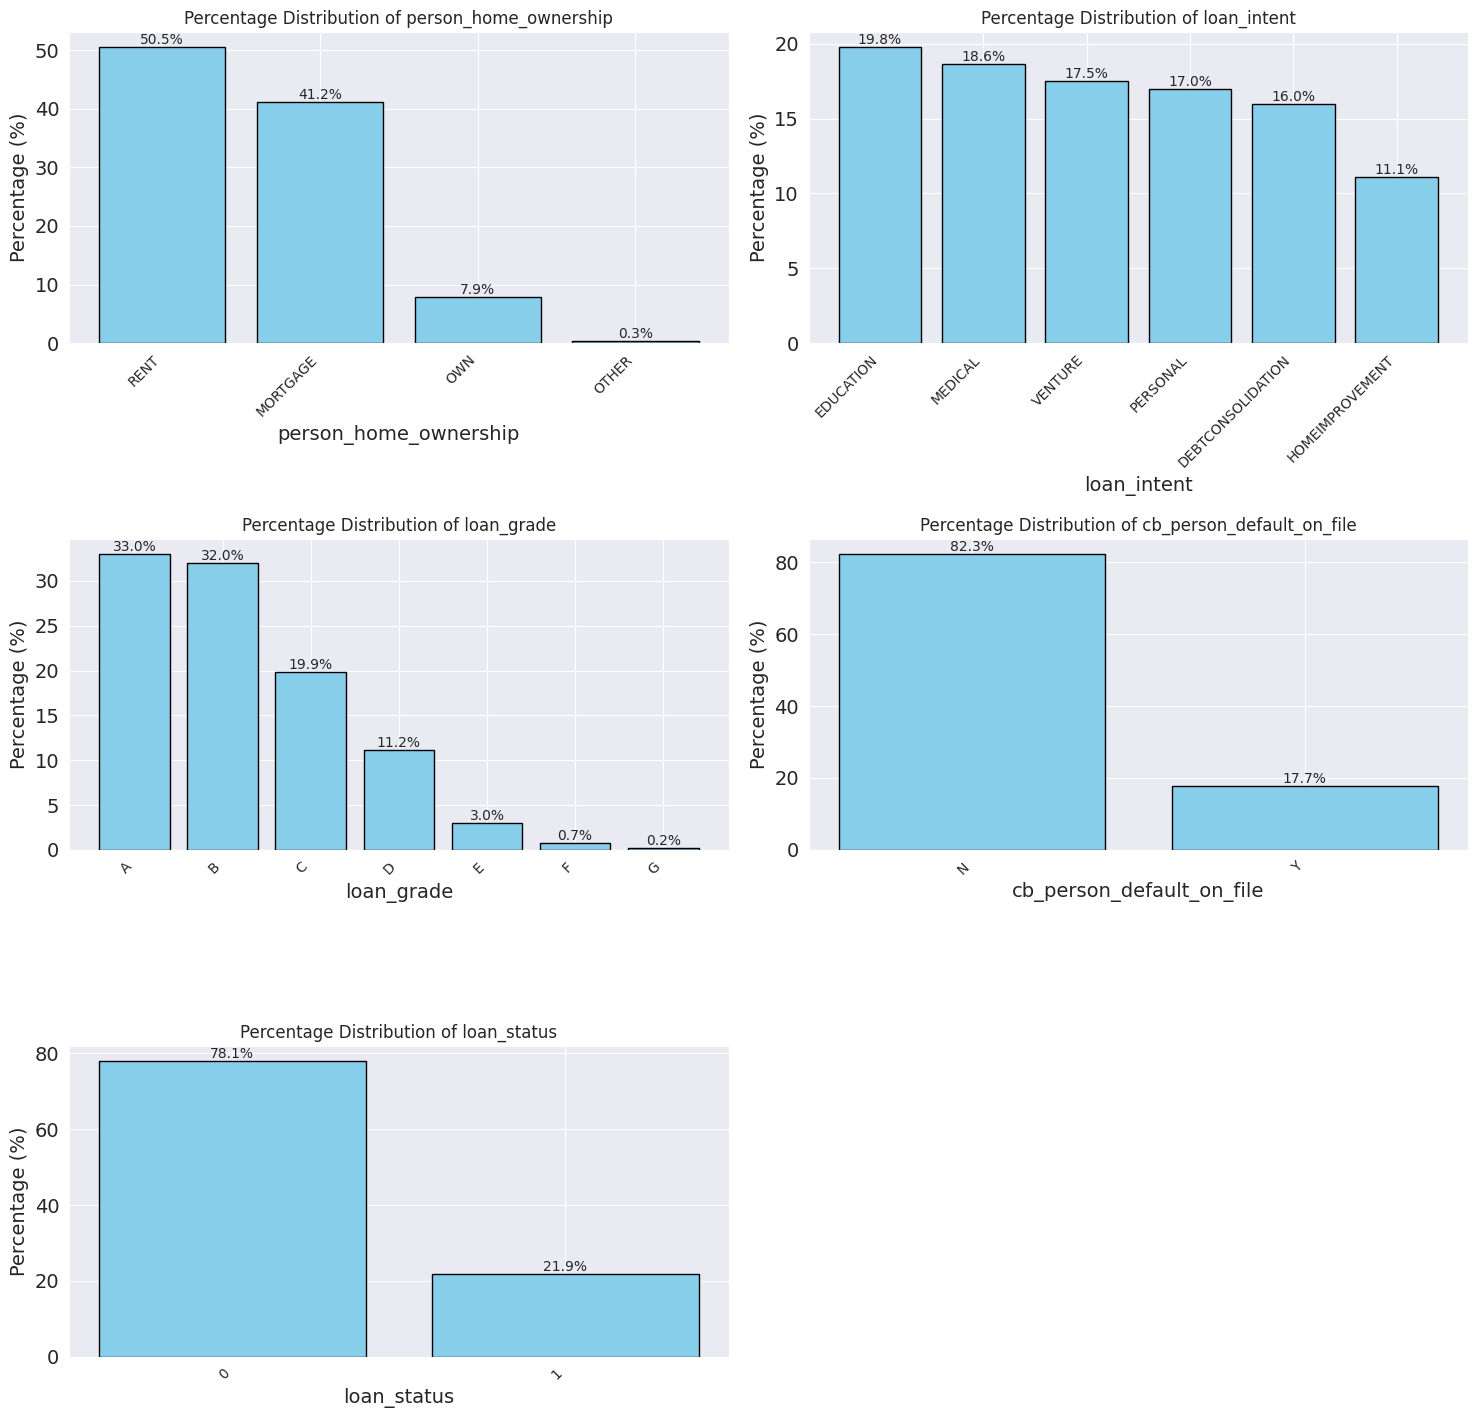

In [ ]:
import matplotlib.pyplot as plt

num_columns = 2

# Calculate the number of rows needed for the grid
num_rows = len(categorical_cols) // num_columns + (len(categorical_cols) % num_columns > 0)

# Create a grid of bar charts
plt.figure(figsize=(15, 5 * num_rows))  # Increase figure size for more space

for i, col in enumerate(categorical_cols):
    plt.subplot(num_rows, num_columns, i + 1)

    # Calculate value counts and percentages
    value_counts = df[col].value_counts()
    percentages = value_counts / value_counts.sum() * 100

    # Create a bar chart
    bars = plt.bar(value_counts.index, percentages, color='skyblue', edgecolor='black')

    # Display percentage values on top of each bar
    for bar, percentage in zip(bars, percentages):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{percentage:.1f}%',
                 ha='center', va='bottom', fontsize=10)

    # Rotate x-axis labels to avoid overlap
    plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotate labels by 45 degrees

    # Set labels and title
    plt.xlabel(col)
    plt.ylabel('Percentage (%)')
    plt.title(f'Percentage Distribution of {col}', fontsize=12)

# Adjust layout for better spacing
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

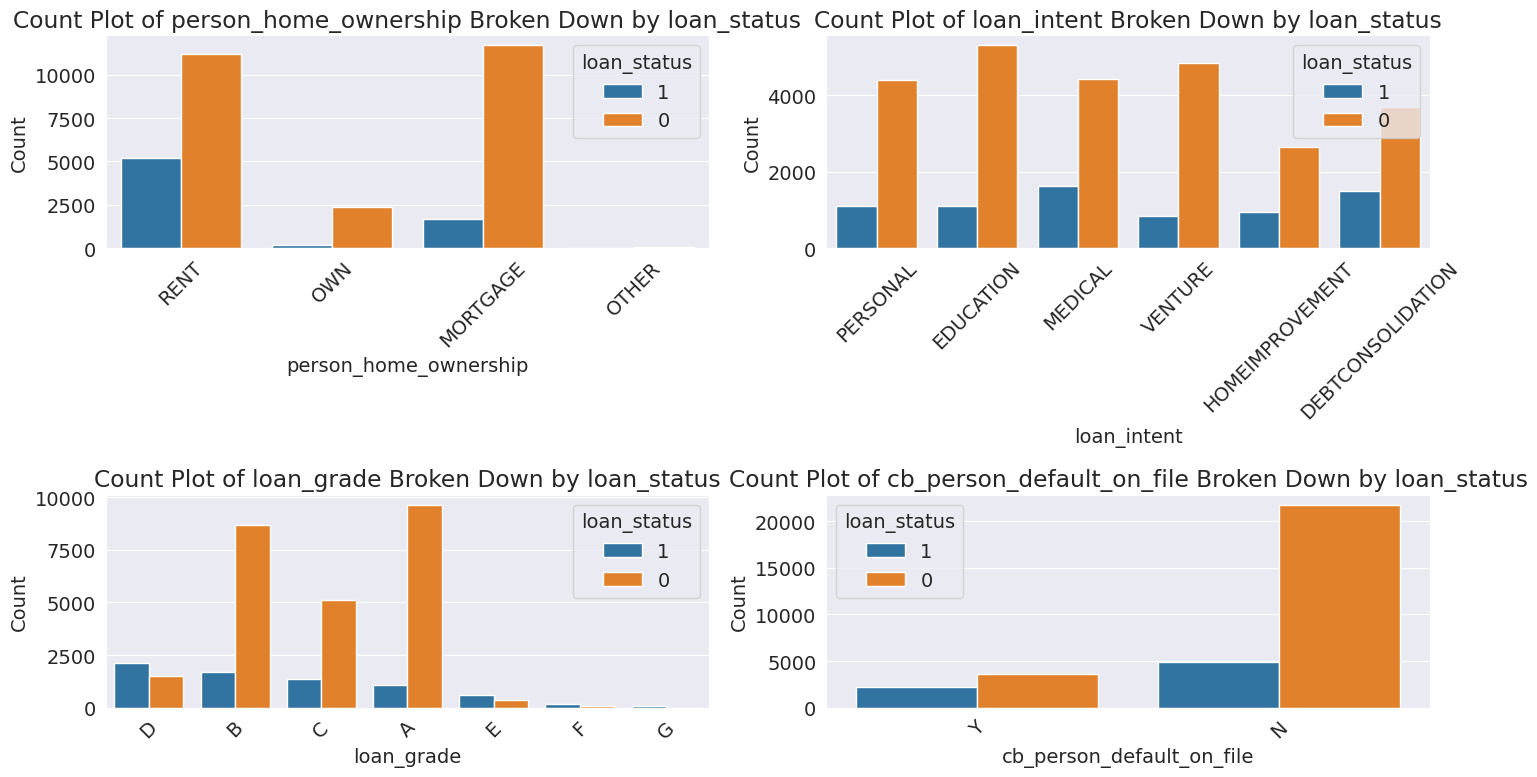

In [ ]:
category_col1_list = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']
category_col2 = 'loan_status'

# Calculate the number of rows needed for the grid
num_rows = len(category_col1_list) // 2 + (len(category_col1_list) % 2 > 0)  # Ceiling division

# Set up subplots with 2 columns
fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(15, 4 * num_rows))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Create count plots for each category in 'category_col1' broken down by 'category_col2'
for i, category_col1 in enumerate(category_col1_list):
    sns.countplot(x=category_col1, hue=category_col2, data=df, ax=axes[i])
    axes[i].set_title(f'Count Plot of {category_col1} Broken Down by {category_col2}')
    axes[i].set_xlabel(category_col1)
    axes[i].set_ylabel('Count')
    axes[i].legend(title=category_col2)
    axes[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels

# Remove empty subplots if any
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()

<ipython-input-37-a3d1b8d20560>:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  total = total_counts[category_name]
<ipython-input-37-a3d1b8d20560>:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  total = total_counts[category_name]
<ipython-input-37-a3d1b8d20560>:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  total = total_counts[category_name]
<ipython-input-37-a3d1b8d20560>:39: FutureWarning: Series.__getitem__ treating key

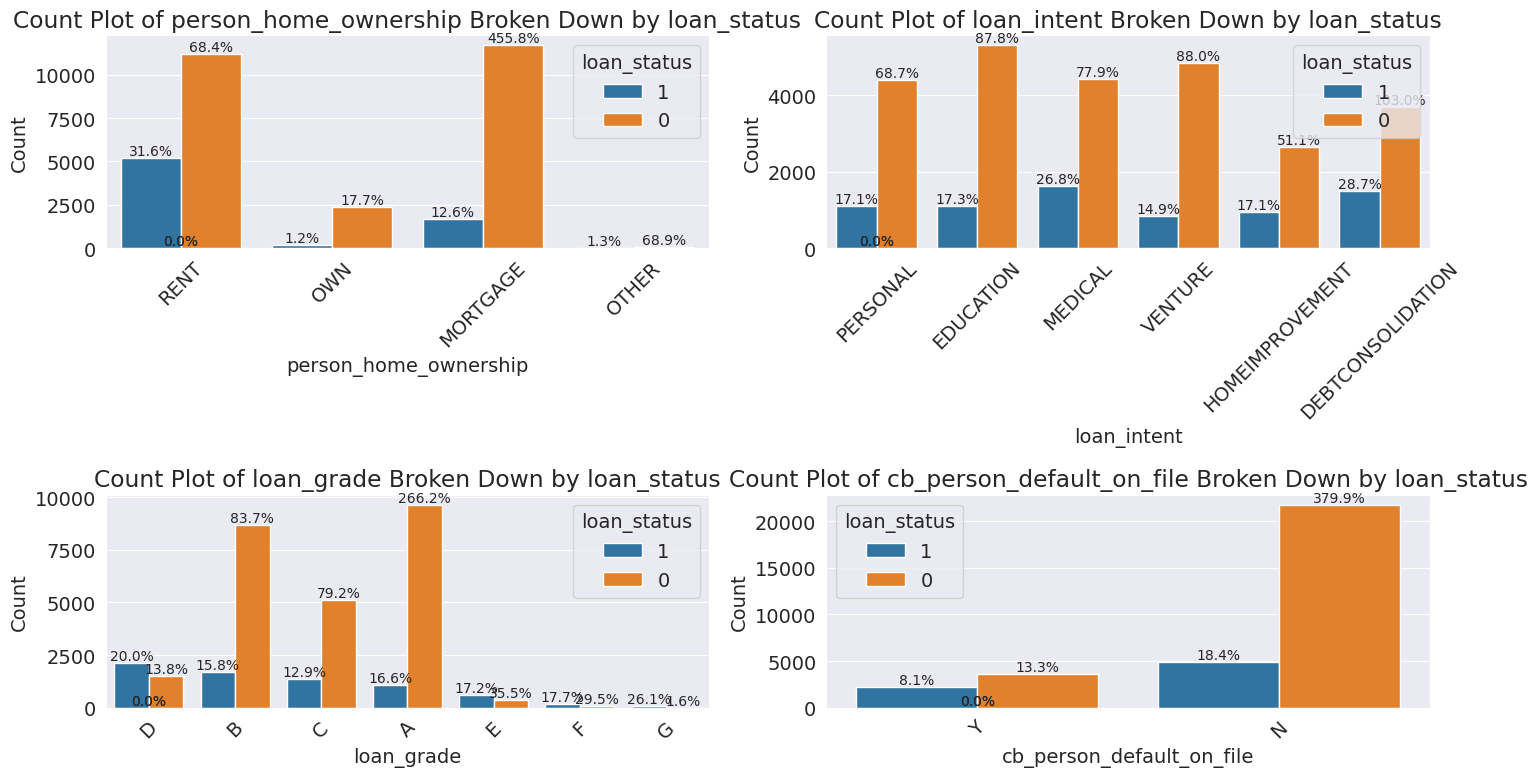

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

category_col1_list = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']
category_col2 = 'loan_status'

# Calculate the number of rows needed for the grid
num_rows = len(category_col1_list) // 2 + (len(category_col1_list) % 2 > 0)  # Ceiling division

# Set up subplots with 2 columns
fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(15, 4 * num_rows))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Create count plots for each category in 'category_col1' broken down by 'category_col2'
for i, category_col1 in enumerate(category_col1_list):
    # Create the count plot
    ax = sns.countplot(x=category_col1, hue=category_col2, data=df, ax=axes[i])
    axes[i].set_title(f'Count Plot of {category_col1} Broken Down by {category_col2}')
    axes[i].set_xlabel(category_col1)
    axes[i].set_ylabel('Count')
    axes[i].legend(title=category_col2)
    axes[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels

    # Calculate the total counts per group to compute percentages
    total_counts = df[category_col1].value_counts()

    # Iterate over the bars to annotate with percentages
    for p in ax.patches:
        # Get the height of the bar (count)
        height = p.get_height()

        # Get the category name from the x-ticks
        category_index = int(p.get_x() + p.get_width() / 2)  # Calculate the index
        category_name = ax.get_xticks()[category_index]  # Get the category name from x-ticks

        # Get the total count for the current category using .iloc
        total = total_counts[category_name]

        # Calculate percentage
        percentage = height / total * 100

        # Add the percentage text annotation
        ax.annotate(f'{percentage:.1f}%',
                    (p.get_x() + p.get_width() / 2, height),
                    ha='center', va='bottom', fontsize=10)

# Remove empty subplots if any
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()

#### Exploring Categorical Features
- These features include: `person_home_ownership`, `loan_intent`, `loan_grade`, `loan_status`, `cb_person_default_on_file`;


#### Observations

#### 1) Loan Status(Target)
- The target has two classes. These are `default-(1)` and `non-default-(0)`;
- After removing duplicates and rows with `NaN`, there are **22,313 default** cases and **6,188 non-default** cases. In percentage terms, that is **78.29%** non-default cases and **21.71%** default;


#### 2) Loan Intent
- Most loans seem to be taken out for **Education**, followed by **medical** and **ventures**. The category with the lowest loan application is **home improvements**;

- People seem to default more on medical loans;

- The distribution of data among the categories seems to be faily balanced, with home improvements being relatively lower;

#### 3) Loan Grade
- The most loans are of **grade A**, followed by **B** and descend that way until G which is practically none. This means loans with the least risk attached are the ones issued the most.

- The grades are highly concentrated between **grade A** as well as **grade B** each having around **30%** of the data. C and D have around **20%** and **11%** respectively. The rest are much lower.

#### 4) Home Ownership
- Most people that apply for loans **Rent** their homes, followed by those who have **Mortgage**, the those who **Own**, who are low compared to the other two categories;

- The data is significantly concentrated around **Rent(50.9%)** and **Mortgage(41.2)**, with about only **7.6%** being **Own**;

#### 5) Default History
- From the applicants, **17.9%** of the applicants have a history of defaulting on payments.

### Exploring numerical Features

- The numeral columns all seem to be skewed right;
- The **person_age** and **person_emp_length** have values that are unrealistic, which explains the long tails;


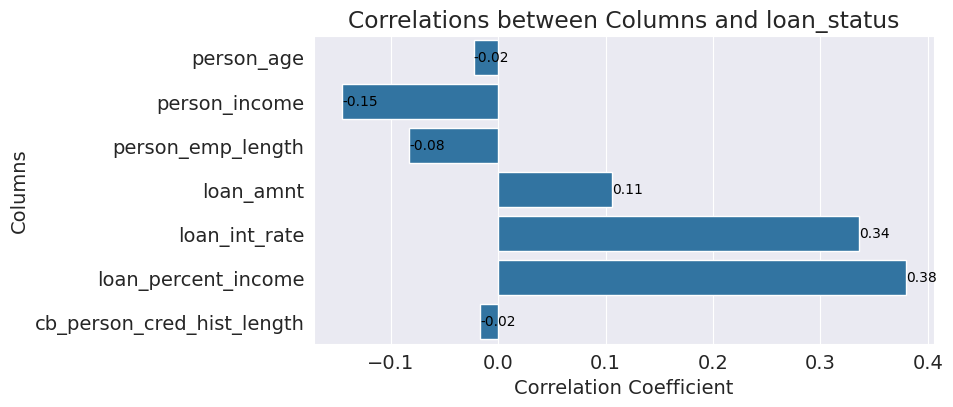

In [ ]:
target_column = 'loan_status'  # Replace with your actual target column name

# Calculate correlations between numeric columns and the target variable
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
correlations = df[numeric_columns].corrwith(df[target_column])

# Create a horizontal bar chart with labels
plt.figure(figsize=(8, 4))
ax = sns.barplot(x=correlations, y=correlations.index)

# Add values as labels on the bars
for i, value in enumerate(correlations):
    ax.text(value, i, f'{value:.2f}', va='center', fontsize=10, color='black')

plt.title(f'Correlations between Columns and {target_column}')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Columns')
plt.show()

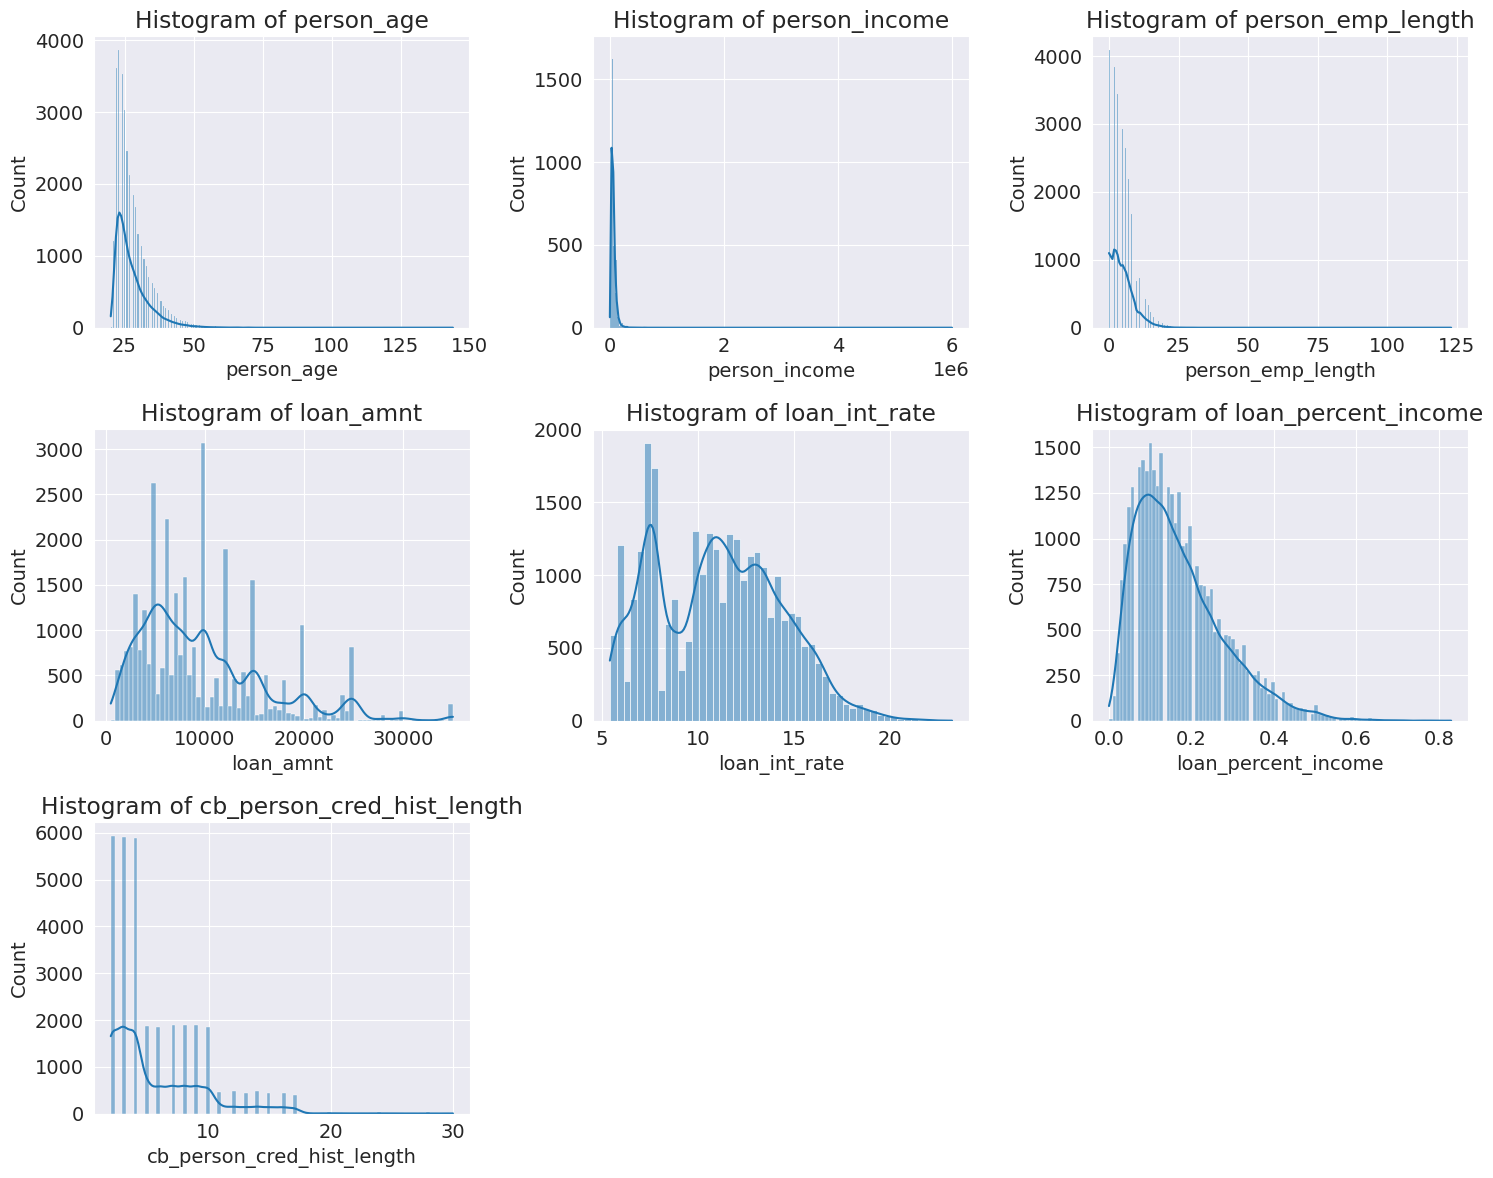

In [ ]:
num_rows = len(numeric_cols) // 3 + (len(numeric_cols) % 3 > 0)  # Ceiling division

# Set up subplots with 3 columns
fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 4 * num_rows))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Iterate through numerical columns and create histograms
for i, col in enumerate(numeric_cols):
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

# Remove empty subplots if any
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()

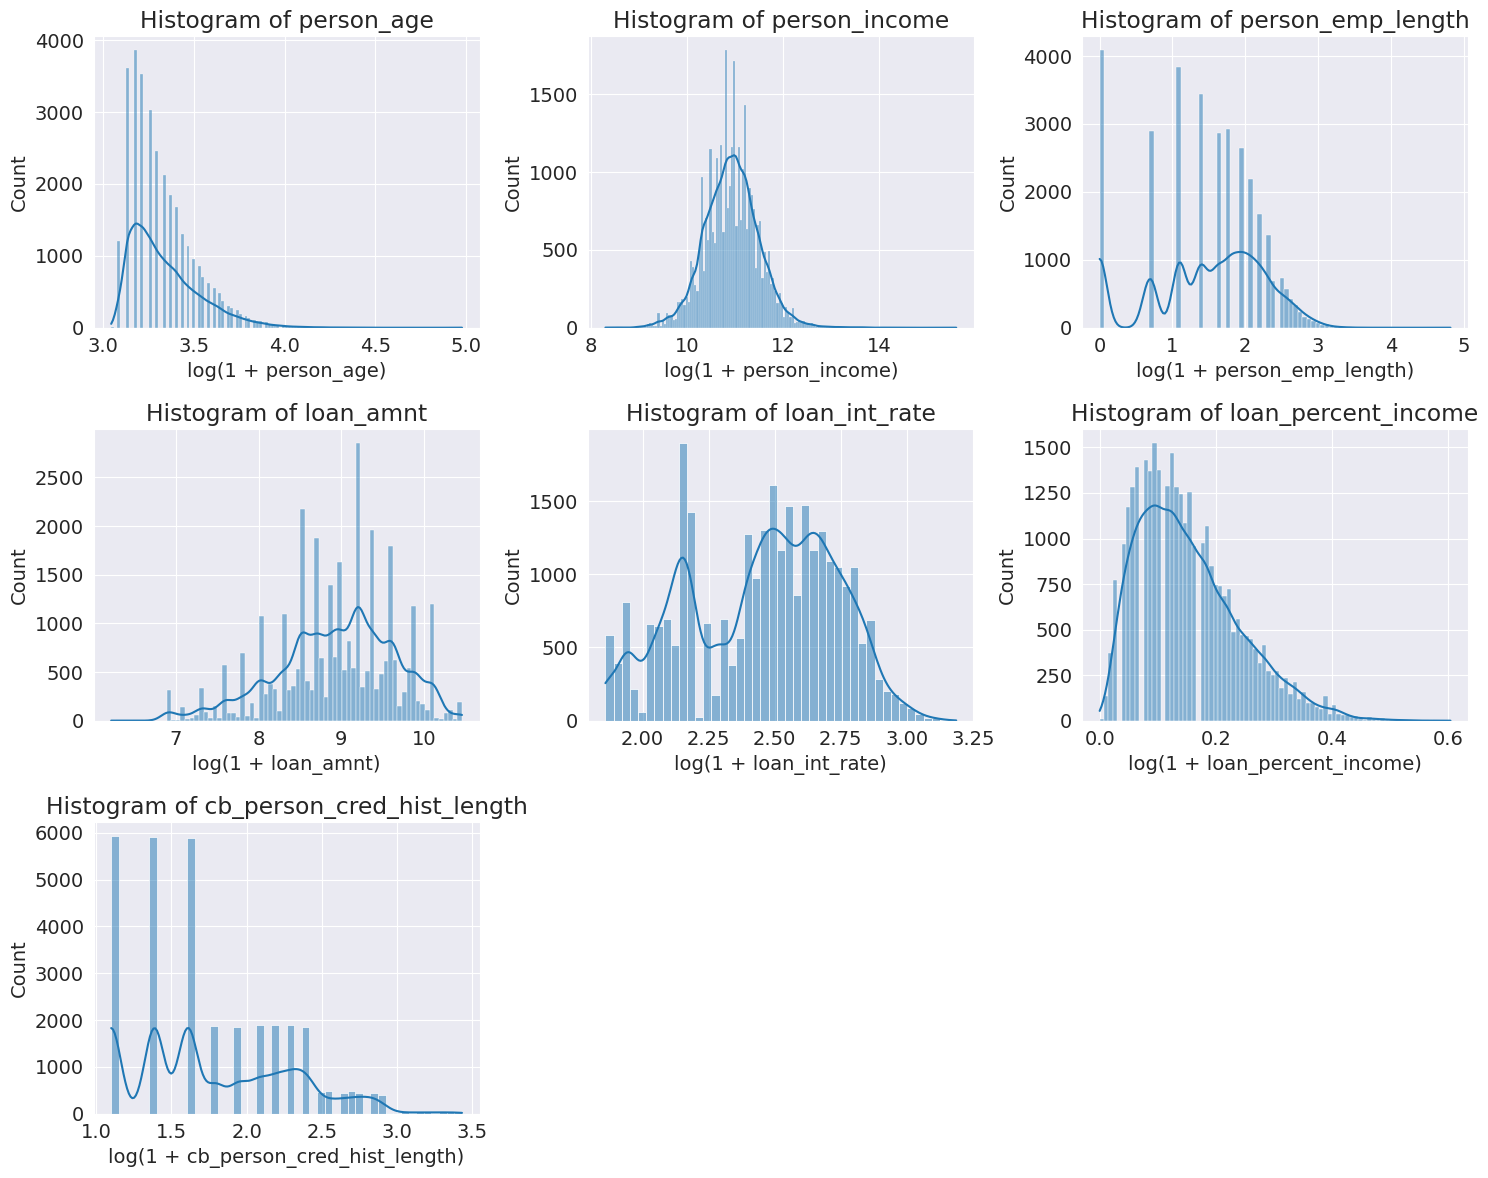

In [ ]:
# Calculate the number of rows needed for the grid (ceiling division)
num_rows = len(numeric_cols) // 3 + (len(numeric_cols) % 3 > 0)

# Set up subplots with 3 columns
fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 4 * num_rows))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Iterate through numerical columns and create histograms after applying log transformation
for i, col in enumerate(numeric_cols):
    # Apply log1p transformation (log(1 + x)) to handle zeros and negative values
    log_data = np.log1p(df[col])

    # Plot the histogram of the log-transformed data
    sns.histplot(log_data, kde=True, ax=axes[i])
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel(f'log(1 + {col})')
    axes[i].set_ylabel('Count')

# Remove empty subplots if any
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()


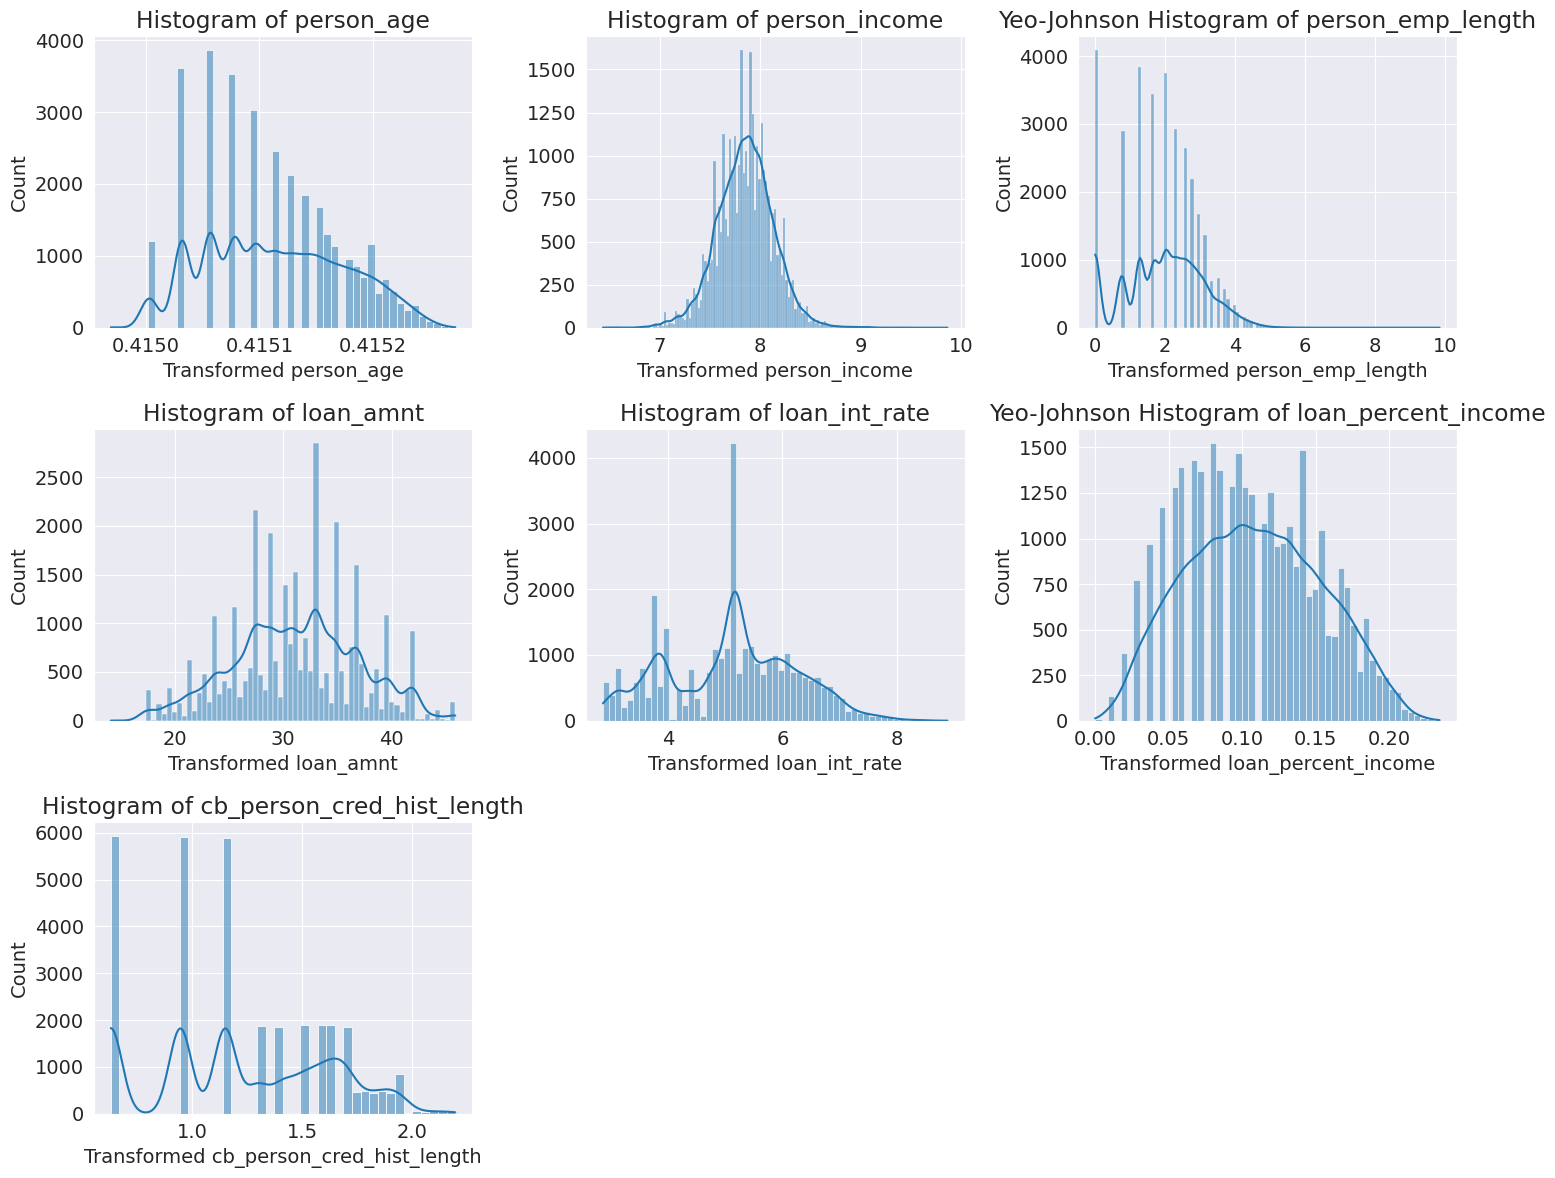

In [ ]:
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Calculate the number of rows needed for the grid (ceiling division)
num_rows = len(numeric_cols) // 3 + (len(numeric_cols) % 3 > 0)

# Set up subplots with 3 columns
fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 4 * num_rows))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Iterate through numerical columns and create histograms after applying Box-Cox or Yeo-Johnson transformation
for i, col in enumerate(numeric_cols):
    col_data = df[col]

    # Fill NaN or infinite values with the median
    col_data_clean = col_data.replace([np.inf, -np.inf], np.nan).fillna(col_data.median())

    # Handle non-positive values for Box-Cox
    if (col_data_clean <= 0).any():
        # Use Yeo-Johnson transformation for data that includes negative values or zeros
        transformed_data, _ = stats.yeojohnson(col_data_clean)
        axes[i].set_title(f'Yeo-Johnson Histogram of {col}')
    else:
        # Apply Box-Cox transformation if all values are positive
        transformed_data, _ = stats.boxcox(col_data_clean)
        axes[i].set_title(f'Histogram of {col}')

    # Plot the transformed data
    sns.histplot(transformed_data, kde=True, ax=axes[i])
    axes[i].set_xlabel(f'Transformed {col}')
    axes[i].set_ylabel('Count')

# Remove empty subplots if any
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()


<ipython-input-14-f22731c7ce09>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{col}_sqrt'] = np.sqrt(df[col])


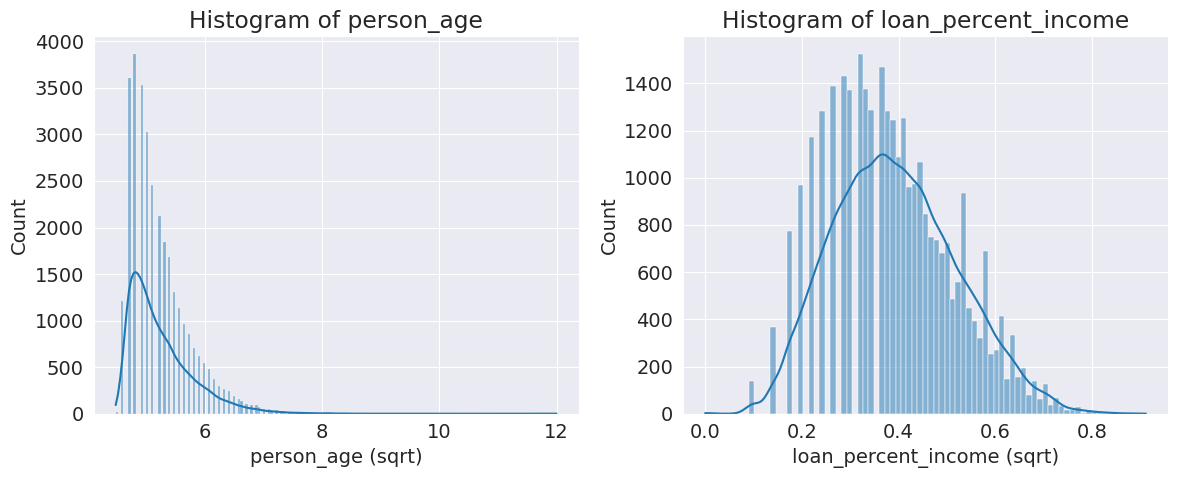

In [ ]:
cols_to_transform = ['person_age', 'loan_percent_income']

# Apply square root transformation
for col in cols_to_transform:
    df[f'{col}_sqrt'] = np.sqrt(df[col])

# Set up subplots with 2 columns for the transformed data
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Iterate through the transformed columns and create histograms
for i, col in enumerate(cols_to_transform):
    sns.histplot(df[f'{col}_sqrt'], kde=True, ax=axes[i])
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel(f'{col} (sqrt)')
    axes[i].set_ylabel('Count')

# Adjust layout
plt.tight_layout()
plt.show()

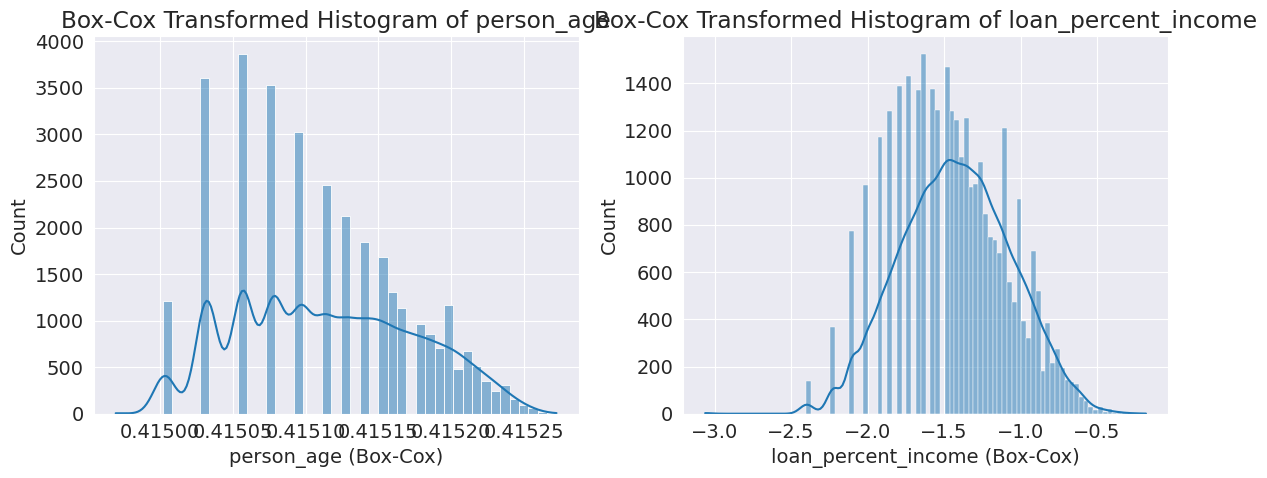

In [ ]:
from scipy import stats
# Columns to transform and plot
cols_to_transform = ['person_age', 'loan_percent_income']

# Create a figure for subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Iterate through the columns and apply Box-Cox transformation
for i, col in enumerate(cols_to_transform):
    # Apply Box-Cox transformation (only works if values are positive)
    transformed_data, _ = stats.boxcox(df[col] + 1e-6)  # Adding small value to avoid zeroes

    # Create a histogram for the transformed data
    sns.histplot(transformed_data, kde=True, ax=axes[i])
    axes[i].set_title(f'Box-Cox Transformed Histogram of {col}')
    axes[i].set_xlabel(f'{col} (Box-Cox)')
    axes[i].set_ylabel('Count')

# Adjust layout
plt.tight_layout()
plt.show()

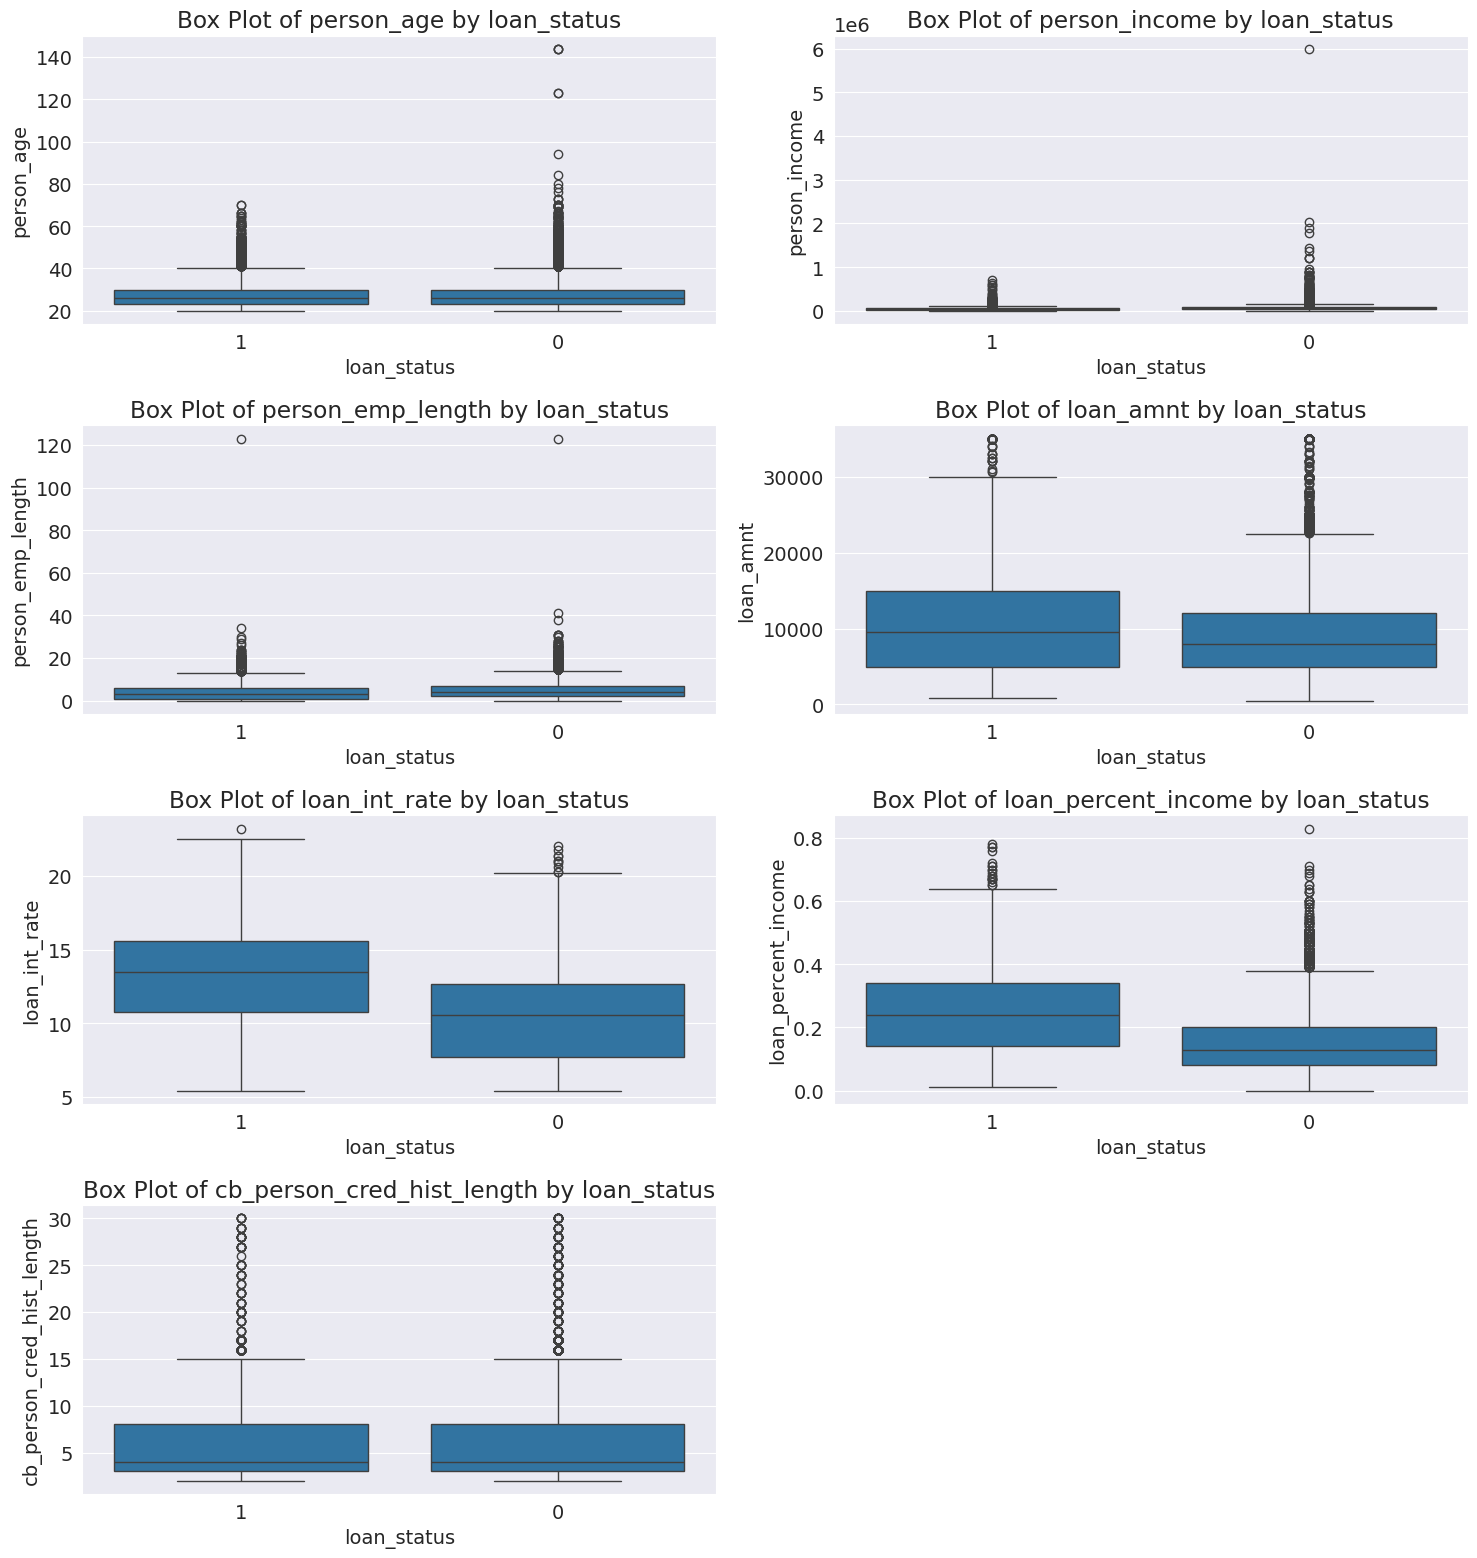

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

category_col = 'loan_status'
numerical_cols = numeric_cols

# Calculate the number of rows needed for the grid
num_rows = len(numerical_cols) // 2 + (len(numerical_cols) % 2 > 0)

# Set up subplots with 2 columns
fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(15, 4 * num_rows))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Create box plots for each numerical column broken down by 'loan_status'
for i, num_col in enumerate(numerical_cols):
    sns.boxplot(x=category_col, y=num_col, data=df, ax=axes[i])
    axes[i].set_title(f'Box Plot of {num_col} by {category_col}')
    axes[i].set_xlabel(category_col)
    axes[i].set_ylabel(num_col)

# Remove empty subplots if any
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

# Assuming df is your DataFrame and 'category_col' is your categorical column
category_col = 'loan_status'
numerical_cols = numeric_cols

outlier_counts = {}

# Iterate over each numerical column
for num_col in numerical_cols:
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df[num_col].quantile(0.25)
    Q3 = df[num_col].quantile(0.75)
    IQR = Q3 - Q1

    # Calculate the lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Count outliers for each category in the categorical column
    outlier_count = df[(df[num_col] < lower_bound) | (df[num_col] > upper_bound)]

    # Group by categorical column and count outliers
    outlier_counts[num_col] = outlier_count.groupby(category_col).size()

# Convert outlier counts to DataFrame for better visualization
outlier_counts_df = pd.DataFrame(outlier_counts).fillna(0)

print(outlier_counts_df)


             person_age  person_income  person_emp_length  loan_amnt  \
loan_status                                                            
0                  1173           1334                709       1071   
1                   318            144                143        608   

             loan_int_rate  loan_percent_income  cb_person_cred_hist_length  
loan_status                                                                  
0                        1                  165                         892  
1                        5                  485                         247  


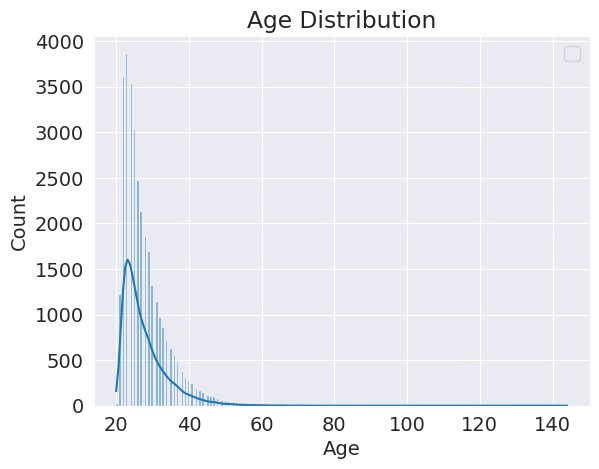

In [ ]:
sns.histplot(df['person_age'], kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend()
plt.show()

### Filtering some extreme outliers

- There are values for age and years of employment that are unrealistic. These values will be filtered out.
- Any other values that are outliers will be considered acceptable part of the data.

In [ ]:
person_age_col = 'person_age'
person_emp_length_col = 'person_emp_length'

# Create a new DataFrame with filtered values
filtered_df = df.loc[(df[person_age_col] <= 80) & (df[person_emp_length_col] <= 60)]
filtered_df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status,person_age_sqrt,loan_percent_income_sqrt
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0.10,N,2,0,4.582576,0.316228
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,0.57,N,3,1,5.000000,0.754983
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,0.53,N,2,1,4.795832,0.728011
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,0.55,Y,4,1,4.898979,0.741620
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,0.25,N,2,1,4.582576,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0.11,N,30,0,7.549834,0.331662
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0.15,N,19,0,7.348469,0.387298
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,0.46,N,28,1,8.062258,0.678233
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0.10,N,26,0,7.483315,0.316228


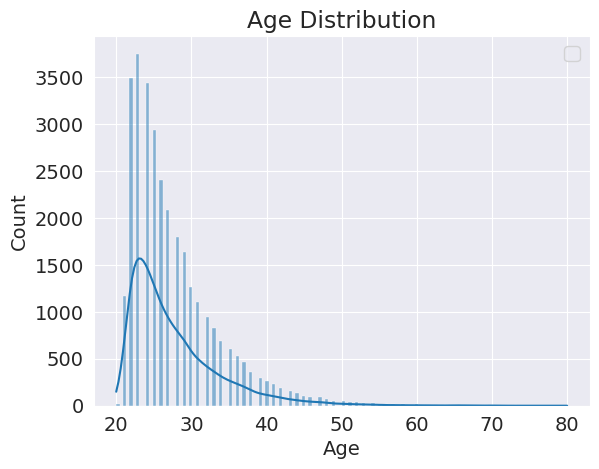

In [ ]:
sns.histplot(filtered_df['person_age'], kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend()
plt.show()

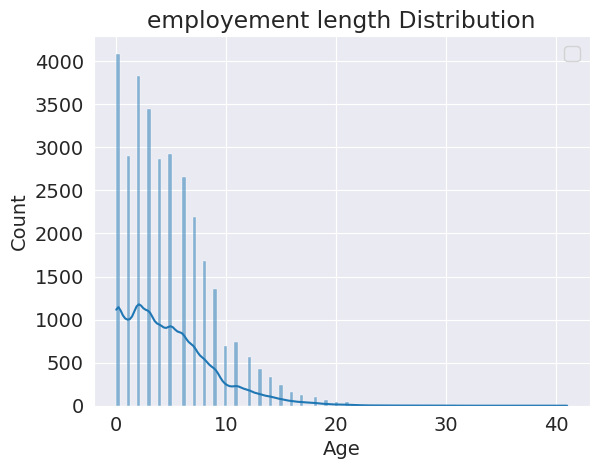

In [ ]:
sns.histplot(filtered_df['person_emp_length'], kde=True)
plt.title('employement length Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend()
plt.show()

## Change Columns Names

In [ ]:
column_name_mapping = {
    'person_age': 'age',
    'person_income': 'income',
    'person_home_ownership': 'home_ownership_type',
    'person_emp_length': 'years_of_employment',
    'percent_income_for_mortgate':'percent_income_mortgaged',
    'cb_person_default_on_file':'default_history',
    'cb_person_cred_history_length':'credit_history_years'

}

# Rename the columns
filtered_df = filtered_df.rename(columns=column_name_mapping)
filtered_df

,age,income,home_ownership_type,years_of_employment,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,default_history,cb_person_cred_hist_length,loan_status,person_age_sqrt,loan_percent_income_sqrt
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0.10,N,2,0,4.582576,0.316228
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,0.57,N,3,1,5.000000,0.754983
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,0.53,N,2,1,4.795832,0.728011
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,0.55,Y,4,1,4.898979,0.741620
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,0.25,N,2,1,4.582576,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0.11,N,30,0,7.549834,0.331662
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0.15,N,19,0,7.348469,0.387298
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,0.46,N,28,1,8.062258,0.678233
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0.10,N,26,0,7.483315,0.316228


In [ ]:
file_path = '/content/drive/MyDrive/Machine Learning/Explored_data.csv'

In [ ]:
filtered_df.to_csv(file_path, index=False)